# [STEP 1] 데이터 준비하기 : 수강생의 나이와 게임 점수를 dataframe으로 입력하기

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame(np.array([[26,75],[24,83],[23,78],[24,82],
                            [25,93],[26,87],[17,96],[18,83],
                            [19,80],[30,79],[31,82],[32,62],
                           [33,92],[34,91],[45,83],[46,80],
                            [37,82],[18,93],[19,84],[40,74]]),columns=['Age','Score'])
df.head(5)

,Age,Score
0,26,75
1,24,83
2,23,78
3,24,82
4,25,93


# [STEP 2] 데이터를 학습하기

In [3]:
kM_model = KMeans(n_clusters =3)                  #클러스터의 갯수는 3개이다. 
y_pred =kM_model.fit_predict(df[['Age','Score']]) # 3개의 집단으로 사람을 분류하는데, 나이와 점수 데이터릏 활용한다./ 
df['cluster'] = y_pred                            # 사람들이 어떤 집단에 속하는지 데이터 프레임에 추가한다.  
df.head()

,Age,Score,cluster
0,26,75,0
1,24,83,0
2,23,78,0
3,24,82,0
4,25,93,1


# [STEP 3] 클러스터링을 통해 학습한 데이터를 시각화하기

Text(0, 0.5, 'Score')

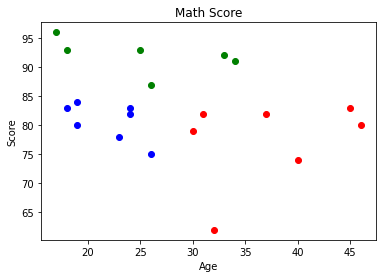

In [5]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# 해당하는 cluster의 값이 0,1,2,의 경우 각각 df1,df2,df3 데이터프레임에 저장합니다. 

plt.scatter(df1['Age'],df1['Score'],color = 'red')
plt.scatter(df2['Age'],df2['Score'],color = 'blue')
plt.scatter(df3['Age'],df3['Score'],color = 'green')
# df1,df2,df3의 분포를 표현할때 색깔을 지정합니다. 

plt.title('Math Score')
plt.xlabel('Age')
plt.ylabel('Score')  
#그래프의 x,y축과 제목을 입력합니다. 

# [STEP 4] 학습한 결과를 요약하기

In [6]:
df.describe() #전체적인 분포를 알아볼 때 활용하는 describe()함수입니다. 

,Age,Score,cluster
count,20.0000,20.000000,20.000000
mean,28.3500,82.950000,0.950000
std,8.8334,7.877182,0.825578
min,17.0000,62.000000,0.000000
25%,22.0000,79.750000,0.000000
50%,26.0000,82.500000,1.000000
75%,33.2500,88.000000,2.000000
max,46.0000,96.000000,2.000000


# [STEP 5] 데이터를 0~1사이의 값으로 정규화하기

In [5]:
scaler = MinMaxScaler()                       #사람들의 나이와 게임 점수를 0과 1사이의 값들로 표현하기 위하여 MinmaxScaler() 함수를 활용합니다. 
scaler.fit(df[['Age']]) 
df['Age']=scaler.transform(df[['Age']])

scaler.fit(df[['Score']]) 
df['Score'] = scaler.transform(df[['Score']]) 
df.head()
                                              #이렇게 Age와 Score함수를 scaler 함수를 통해 0과 1사이로 변환한 후 이를 df의 Age와 Score 행에 새롭게 저장합니다. 


,Age,Score,cluster
0,0.310345,0.382353,0
1,0.241379,0.617647,0
2,0.206897,0.470588,0
3,0.241379,0.588235,0
4,0.275862,0.911765,1


# [STEP 6] 정규화한 데이터를 활용하여 학습하기

In [6]:
kM_model = KMeans(n_clusters = 3)                   #총 cluster의 수를 3개로 설정합니다. 
y_pred = kM_model.fit_predict(df[['Age', 'Score']]) #정규화 한 Age, Score의 값들이 어떤 cluster에 속하는지 학습합니다. 
df['cluster'] = y_pred 
df.head(5)

,Age,Score,cluster
0,0.310345,0.382353,0
1,0.241379,0.617647,0
2,0.206897,0.470588,0
3,0.241379,0.588235,0
4,0.275862,0.911765,2


# [STEP 7] 클러스터의 중심값 출력하기

In [9]:
kM_model.cluster_centers_ #3개의 cluster의 중심값을 출력합니다. 

array([[0.14176245, 0.72875817],
       [0.76436782, 0.6372549 ],
       [0.39310345, 0.38823529]])

# [STEP 8] 학습한결과를 중심과 함께 시각화하기

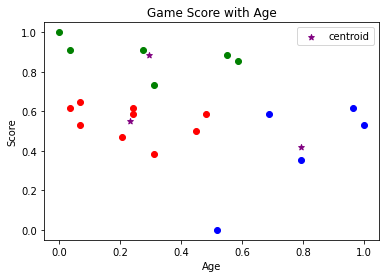

In [7]:
df1 = df[df.cluster == 0] 
df2 = df[df.cluster == 1] 
df3 = df[df.cluster == 2] 
plt.scatter(df1['Age'], df1['Score'], color = 'red') 
plt.scatter(df2['Age'], df2['Score'], color = 'blue') 
plt.scatter(df3['Age'], df3['Score'], color = 'green')
#df1, df2, df3의 3개 클러스터를 색상별로 지정한 후 산점도를 표현합니다. 

plt.scatter( kM_model.cluster_centers_[ :, 0], kM_model.cluster_centers_[ :, 1], color = 'purple', marker = '*', label = 'centroid') 
#cluster의 중심값을 표현하기 위해 color, marker, label값을 저장합니다. 

plt.title('Game Score with Age') 
plt.xlabel('Age') 
plt.ylabel('Score') 
#표의 x축, y축, 이름을 저장합니다. 

plt.legend( )